In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

from cleanplots import *
import matplotlib.pyplot as plt
from bsccm import BSCCM
import numpy as onp
import time
from tqdm import tqdm
from led_array.bsccm_utils import *
from plot_utils import *
from led_array.bsccm_utils import *
from image_utils import *
from matplotlib.colors import LinearSegmentedColormap
from jax import jit
import jax.numpy as np


bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

Opening BSCCM
Opened BSCCM


## Show concept of gaussian approximations

In [2]:
# N_images = 2000

# x2_offset = (3, 0)
# photons_per_pixel = 220
# # channel = 'DPC_Right'
# channel = 'LED119'
# intensity_space_max = 100

# current_photons_per_pixel = np.mean(load_bsccm_images(bsccm, channel, 50, convert_units_to_photons=True))
# photon_fraction = photons_per_pixel / current_photons_per_pixel

# x1, x2 = read_images_and_sample_intensities(bsccm, channel, x2_offset, N_images, photon_fraction=photon_fraction, median_filter=True)

In [3]:
# from scipy.stats import multivariate_normal
# import cmasher as cmr
# from matplotlib.patches import Circle


# # display_lim = (30, 80)
# display_lim = (0, 350)

# num_bins = 50
# cmap =  cmr.torch.reversed()
# color = get_color_cycle()[0]
# # cmap = LinearSegmentedColormap.from_list(f'cmap', [(1,1,1), color])


# bins = np.linspace(*display_lim, num_bins + 1)

# # additive_gaussian_noise = [0]
# additive_gaussian_noise = [0, 20, 50]
# fig_dist, ax_dist = plt.subplots(len(additive_gaussian_noise), 2, figsize=(9, 4 * len(additive_gaussian_noise)), sharex=True, sharey=True)
# fig_img, ax_img = plt.subplots(len(additive_gaussian_noise), 3, figsize=(2.5, 1 * len(additive_gaussian_noise)), dpi=300)


# for row_index, gaussian_sigma in enumerate(additive_gaussian_noise):
#     noisy_x1 = x1 + onp.random.normal(0, np.sqrt(x1), size=x1.shape)
#     noisy_x2 = x2 + onp.random.normal(0, np.sqrt(x2), size=x2.shape)

#     noisy_x1 += onp.random.normal(0, gaussian_sigma, size=x1.shape)
#     noisy_x2 += onp.random.normal(0, gaussian_sigma, size=x2.shape)

#     # plot a a 2d historgram of the design matrix
#     p_x, yedges, xedges = np.histogram2d(noisy_x1, noisy_x2, bins=bins)
#     p_x /= p_x.sum()

#     design = np.stack([noisy_x1, noisy_x2], axis=1)
#     # compute mean and covariance
#     mean = np.mean(design, axis=0)
#     cov = np.cov(design.T)

#     gaussian_pdf = multivariate_normal.pdf(np.stack(
#         np.meshgrid(np.linspace(*display_lim, num_bins), np.linspace(*display_lim, num_bins)), axis=-1),  mean=mean, cov=cov)
#     gaussian_pdf /= gaussian_pdf.sum()

#     # compute vmin and vmax for both plots
#     vmin = onp.min([p_x, gaussian_pdf])
#     vmax = onp.max([p_x, gaussian_pdf])

#     # plot a a 2d historgram of the design matrix
#     ax_dist[row_index, 0].imshow(p_x, cmap=cmap, origin='lower', extent=[display_lim[0], display_lim[1], display_lim[0], display_lim[1]], vmin=vmin, vmax=vmax)
#     clear_spines(ax_dist[row_index, 0])
#     ax_dist[row_index, 0].set(xticks=display_lim, yticks=display_lim, xlabel='Intensity at x1 (photons)', ylabel='Intensity at x2 (photons)')

#     # make another plot showing the PDF of the Gaussian
#     ax_dist[row_index, 1].imshow(gaussian_pdf, 
#         cmap=cmap, origin='lower', extent=[display_lim[0], display_lim[1], display_lim[0], display_lim[1]], vmin=vmin, vmax=vmax)
#     # draw the major and minor axes of the ellipse
#     eigvals, eigvecs = np.linalg.eigh(cov)
#     # plot them
#     for eigval, eigvec in zip(np.sqrt(eigvals), eigvecs.T):
#         ax_dist[row_index, 1].plot([mean[0], mean[0] +  eigval * eigvec[0]], [mean[1], mean[1] +  eigval * eigvec[1]], color=color, linewidth=2)
#     # same formatting as before
#     clear_spines(ax_dist[row_index, 1])
#     ax_dist[row_index, 1].set(xticks=display_lim, yticks=display_lim, xlabel='Intensity at x1 (photons)')

#     # plot example images
#     images = np.array([
#         load_image_with_synthetic_shot_noise(bsccm, i, channel, photon_fraction=photon_fraction)
#          for i in range(3)])

#     # now add additional noise for demonstration purposes    
#     images += onp.random.normal(0, gaussian_sigma, size=images.shape)
#     for i in range(3):
#         crop = 28
#         cropped_im = images[i][crop:-crop, crop:-crop]
#         ax_img[row_index, i].imshow(cropped_im, cmap='inferno', interpolation='nearest', vmin=display_lim[0], vmax=display_lim[1])
#         ax_img[row_index, i].axis('off')
#         ax_img[row_index, i].add_patch(Circle((cropped_im.shape[1] // 2, cropped_im.shape[0] // 2), 1.5, color=color))
#         ax_img[row_index, i].add_patch(Circle((cropped_im.shape[1] // 2 + x2_offset[0], cropped_im.shape[0] // 2 + x2_offset[1]), 1.5, color=color))    


# # add a colorbar
# fig_dist.subplots_adjust(right=0.9)
# cbar_ax = fig_dist.add_axes([0.92, 0.1, 0.02, 0.8])
# fig_dist.colorbar(cm.ScalarMappable(cmap=cmap), cax=cbar_ax)
# # sparse ticks and label "Probability"
# cbar_ax.set(yticks=[],  ylabel='Probability')

# # add a colorbar
# fig_img.subplots_adjust(right=0.9)
# cbar_ax = fig_img.add_axes([0.92, 0.1, 0.02, 0.8])
# fig_img.colorbar(cm.ScalarMappable(cmap='inferno'), cax=cbar_ax)
# # sparse ticks and label "Probability"
# cbar_ax.set(yticks=[0, 1],  ylabel='Intensity (photons)')


# fig_dist.savefig('/home/hpinkard_waller/figures/intro_slides/' + 'px_gaussian_approx_gaussian_noise' + '.pdf', transparent=True, dpi=600)
# fig_img.savefig('/home/hpinkard_waller/figures/intro_slides/' + 'three_example_images_gaussian_noise' + '.pdf', transparent=True, dpi=600)



In [4]:
# num_images = 1000
# patch_size = 50
# num_patches = 20000
# color = get_color_cycle()[0]

# images = load_bsccm_images(bsccm, 'LED119', num_images=num_images, edge_crop=32, convert_units_to_photons=True)
# images = add_shot_noise_to_experimenal_data(images, photon_fraction=photon_fraction)
# patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches)

# fig, ax = plt.subplots(3, 1, figsize=(6, 5 * len(additive_gaussian_noise)), sharex=True)

# bins = None
# for i, noise_level in enumerate(additive_gaussian_noise):
#     noisy_patches = patches + noise_level * onp.random.randn(*patches.shape)
#     values = compute_eigenvalues(noisy_patches)
#     # plot the eigenvalue spectrum
#     h = OverlayedHistograms(ax=ax[i])
#     h.add(values)
#     h.plot(color=color)
#     bins = h.bins
#     ax[i].set(xlabel='Eigenvalues (photons)', ylabel='Count')
#     # , xlim=[20, 1e7])
#     clear_spines(ax[i])

# fig.savefig('/home/hpinkard_waller/figures/entropy_rates/' + 'intro_eigenvalue_spectrum_different_gaussian_noise' + '.pdf', transparent=True)

## Estimate stationary gaussian processes and draw samples from them

Loading images: 3it [00:03,  1.28s/it]
Computing covariance matrices and sampling: 0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████| 600/600 [00:00<00:00, 461842.98it/s]


computing cov mat



100%|█████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.50it/s]


making positive definite



precomputing masks and variances: 100%|███████████████████████████| 5/5 [00:09<00:00,  1.89s/it]


generating samples


Computing covariance matrices and sampling: 1it [00:16, 16.60s/it]
100%|█████████████████████████████████████████████████████| 600/600 [00:00<00:00, 720464.47it/s]


computing cov mat



100%|█████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.15it/s]


making positive definite



precomputing masks and variances: 100%|███████████████████████████| 5/5 [00:00<00:00, 32.94it/s]
Computing covariance matrices and sampling: 2it [00:17,  7.19s/it]

generating samples



100%|█████████████████████████████████████████████████████| 600/600 [00:00<00:00, 820000.78it/s]


computing cov mat



100%|████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 124.16it/s]


making positive definite



precomputing masks and variances: 100%|███████████████████████████| 5/5 [00:00<00:00, 32.37it/s]
Computing covariance matrices and sampling: 3it [00:17,  5.91s/it]


generating samples


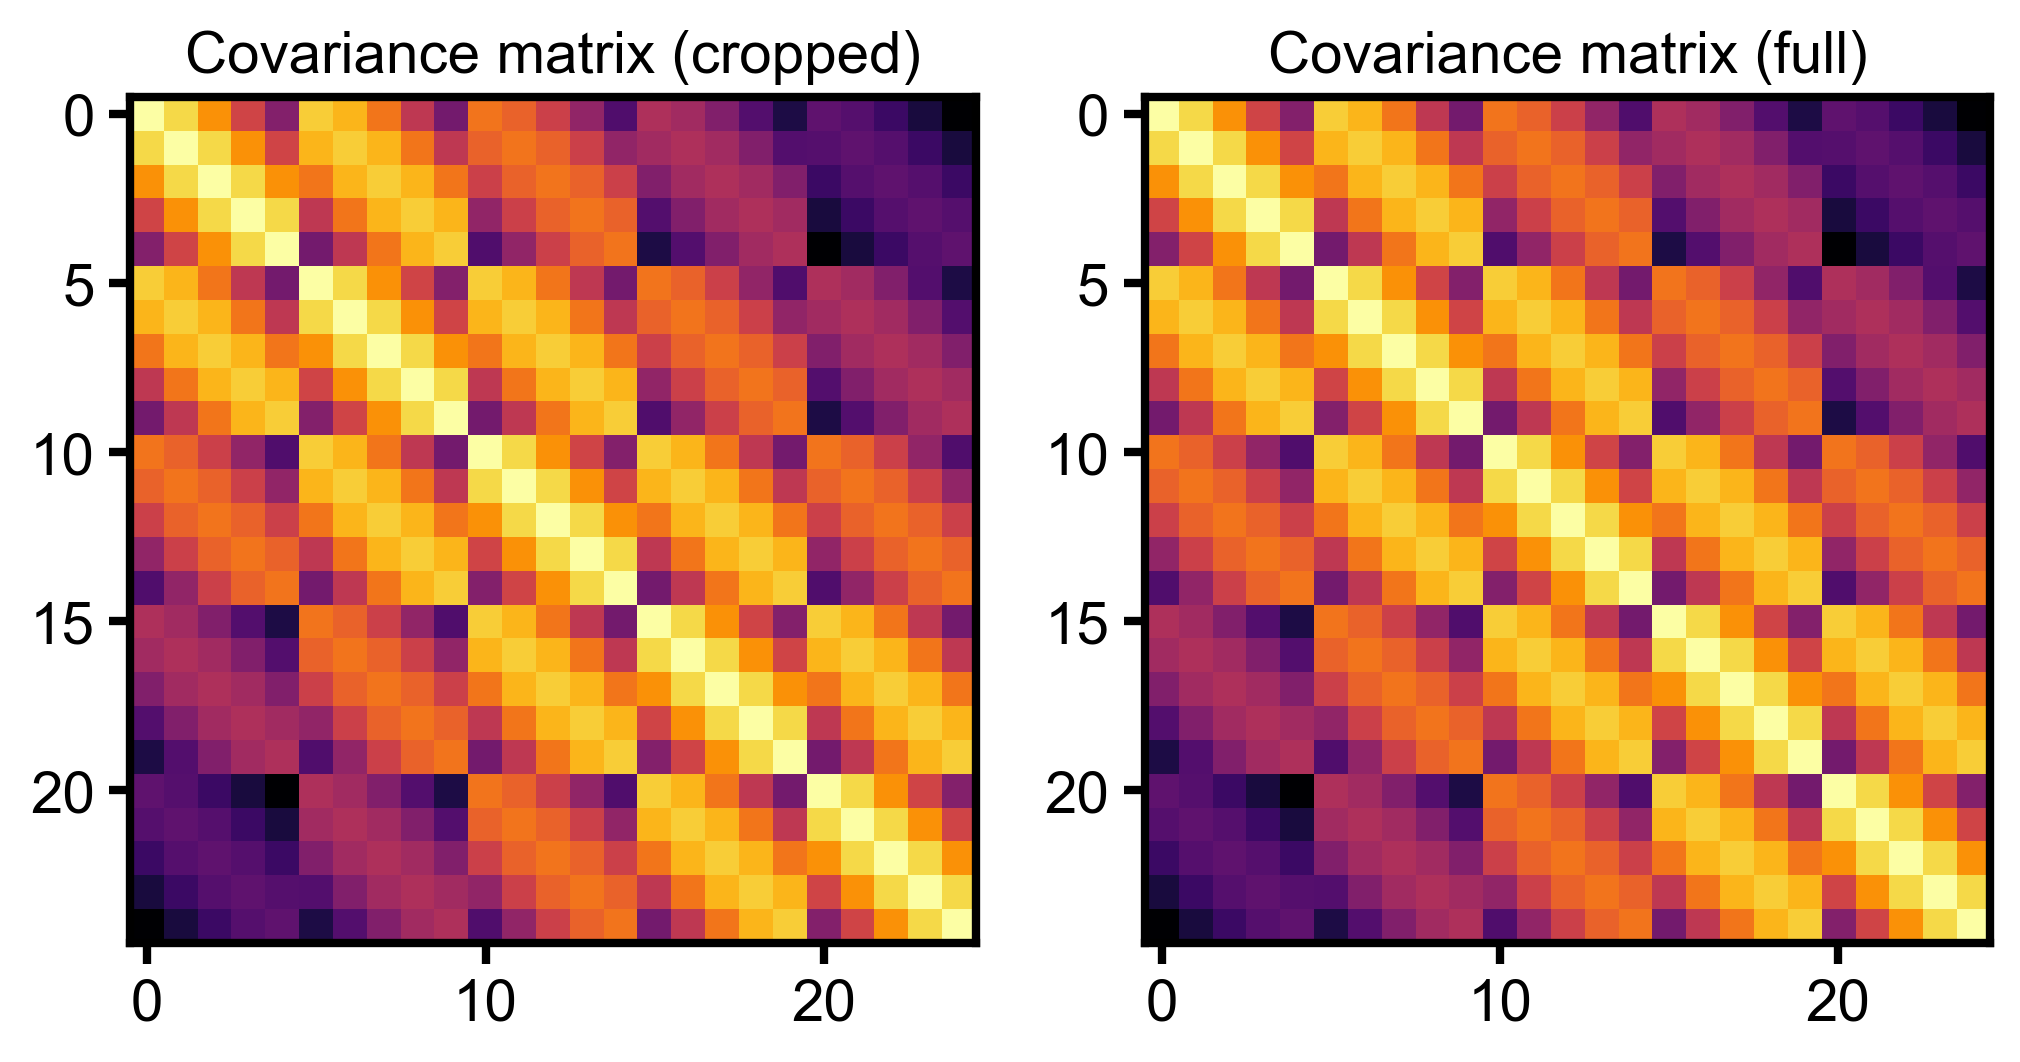

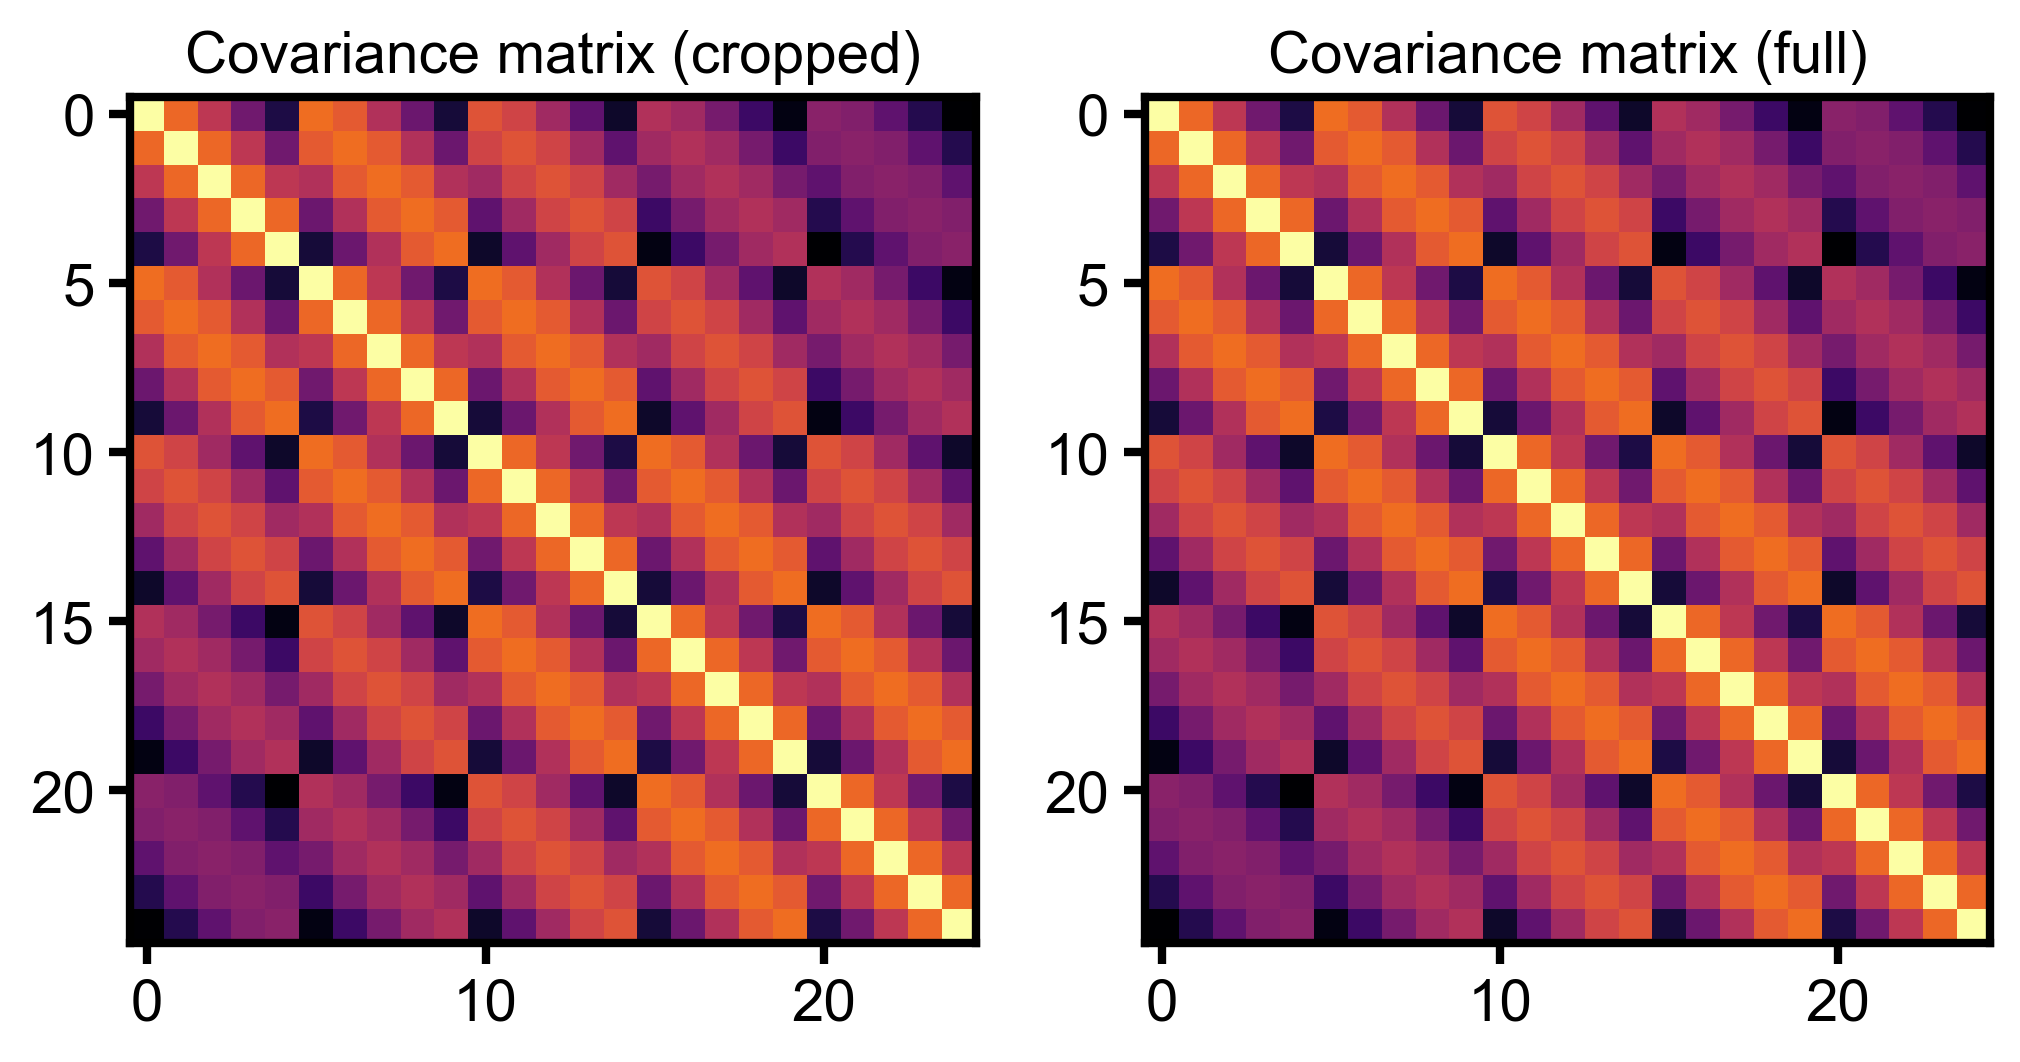

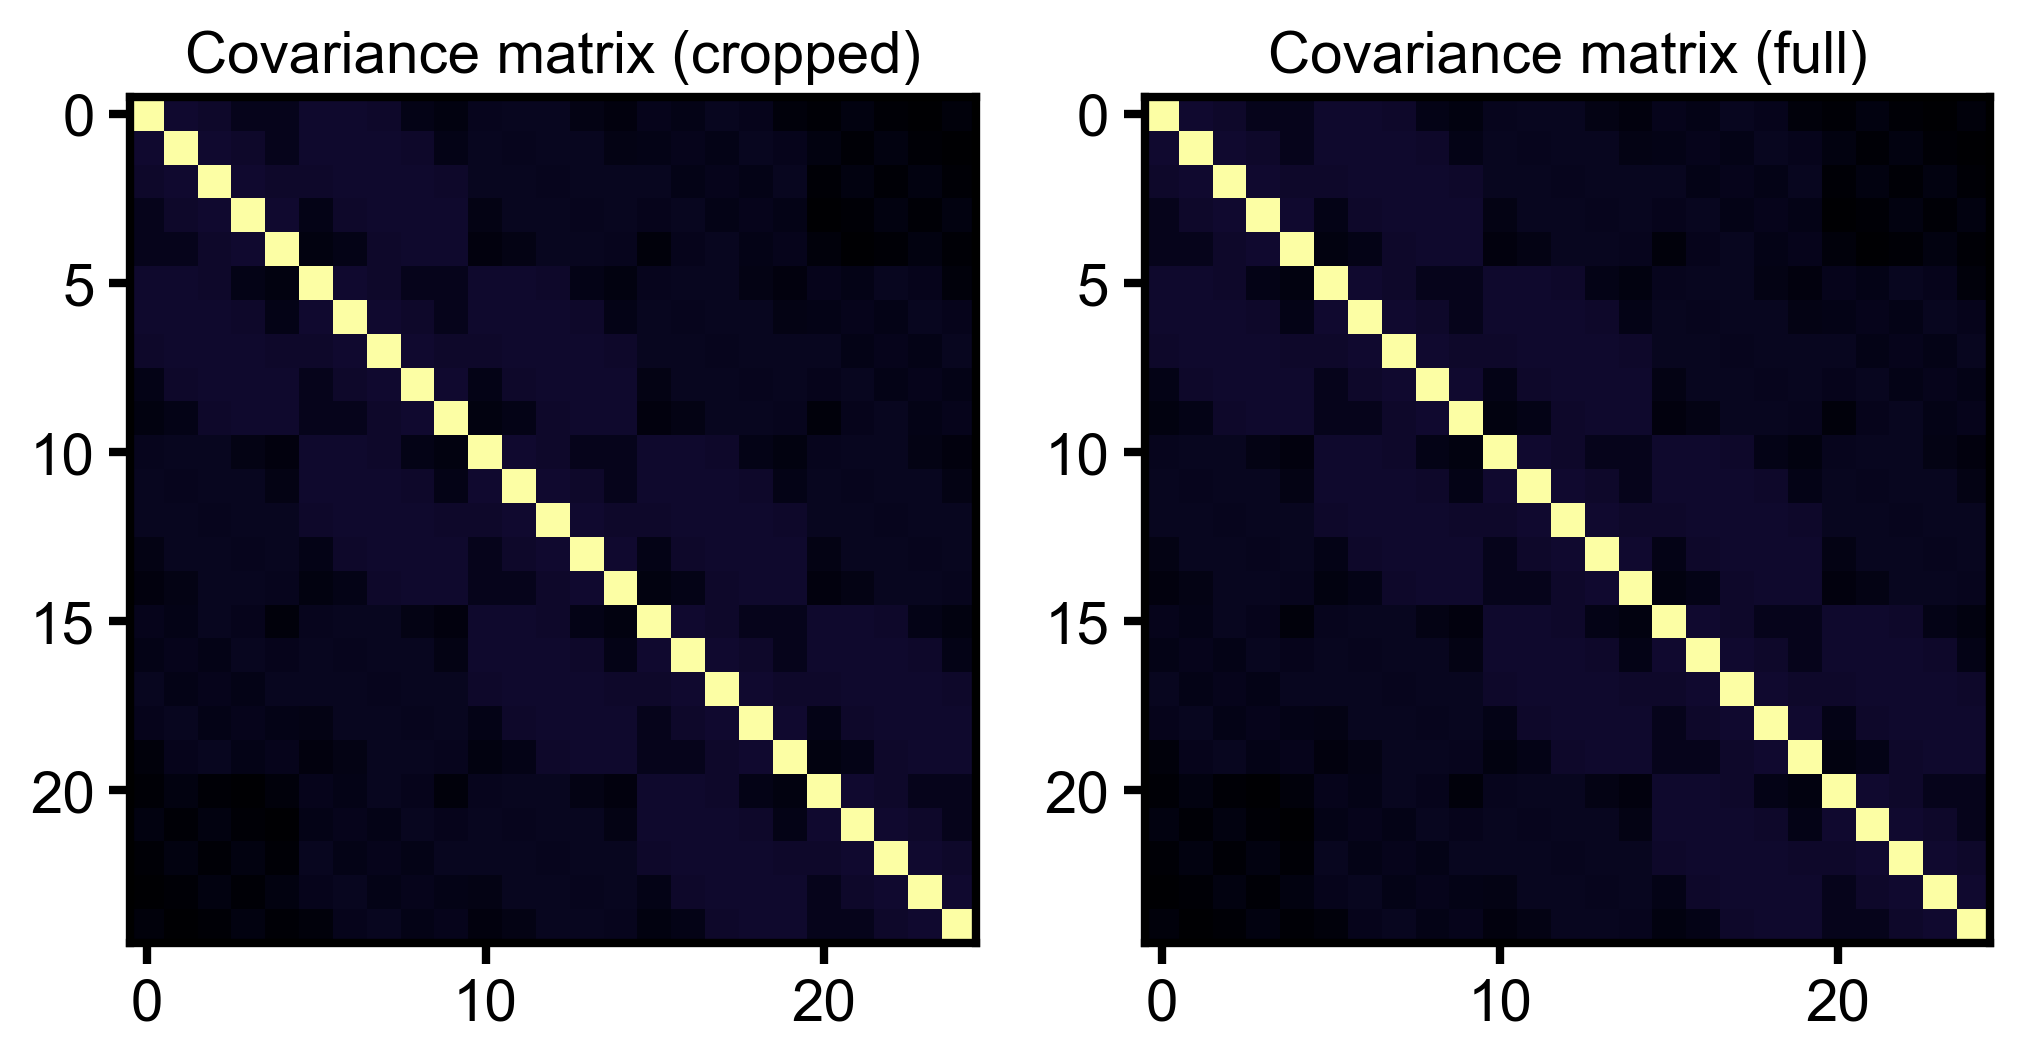

In [5]:
# images used to generate the covariance matrix
num_images = 25000
num_patches = 60000
edge_crop = 16

patch_size = 50 # the size of patches to estimate the covariance matrix from
sample_size = 96 # the size of the samples to generate
num_samples = 5


num_images = 250
num_patches = 600
patch_size = 5
sample_size = 5

photons_per_pixel = 150

channels = ['LED119', 'DPC_Right', 'Brightfield']
# channels = ['LED119', 'DPC_Right']
# channels = ['LED119']


image_samples = {}
noisy_patches_by_channel = {}
images_by_channel = {}
noisy_images_by_channel = {}
for channel_index, channel in tqdm(enumerate(channels), desc='Loading images'):
    images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=True)
    images_by_channel[channel] = images[:num_samples * 10]
    noisy_images_by_channel[channel] = add_shot_noise_to_experimenal_data(images, photon_fraction=photons_per_pixel / np.mean(images))

for channel_index, channel in tqdm(enumerate(channels), desc='Computing covariance matrices and sampling'):
    noisy_patches = extract_patches(noisy_images_by_channel[channel], patch_size=patch_size, num_patches=num_patches, seed=1234)
    noisy_patches_by_channel[channel] = noisy_patches[: num_samples * 10] # for display

    print('computing cov mat')
    cov_mat = compute_stationary_cov_mat(noisy_patches)
    print('making positive definite')
    cov_mat = make_positive_definite(cov_mat, cutoff_percentile=20, show_plot=True)
    # cov_mat = compute_cov_mat(patches) # non-stationary version

    # plot the cov mat
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
    ax[0].imshow(cov_mat[:150, :150], cmap='inferno')
    ax[1].imshow(cov_mat, cmap='inferno')
    ax[0].set(title='Covariance matrix (cropped)')
    ax[1].set(title='Covariance matrix (full)')
    fig.savefig('/home/hpinkard_waller/figures/mutual_information/' + f'stationary_cov_mat_{channel}' + '.pdf', transparent=True)

    samples = generate_stationary_gaussian_process_samples(cov_mat, sample_size, num_samples, 
    prefer_iterative_sampling=False, mean=np.mean(noisy_patches), seed=channel_index * 1000)
    image_samples[channel] = samples
    

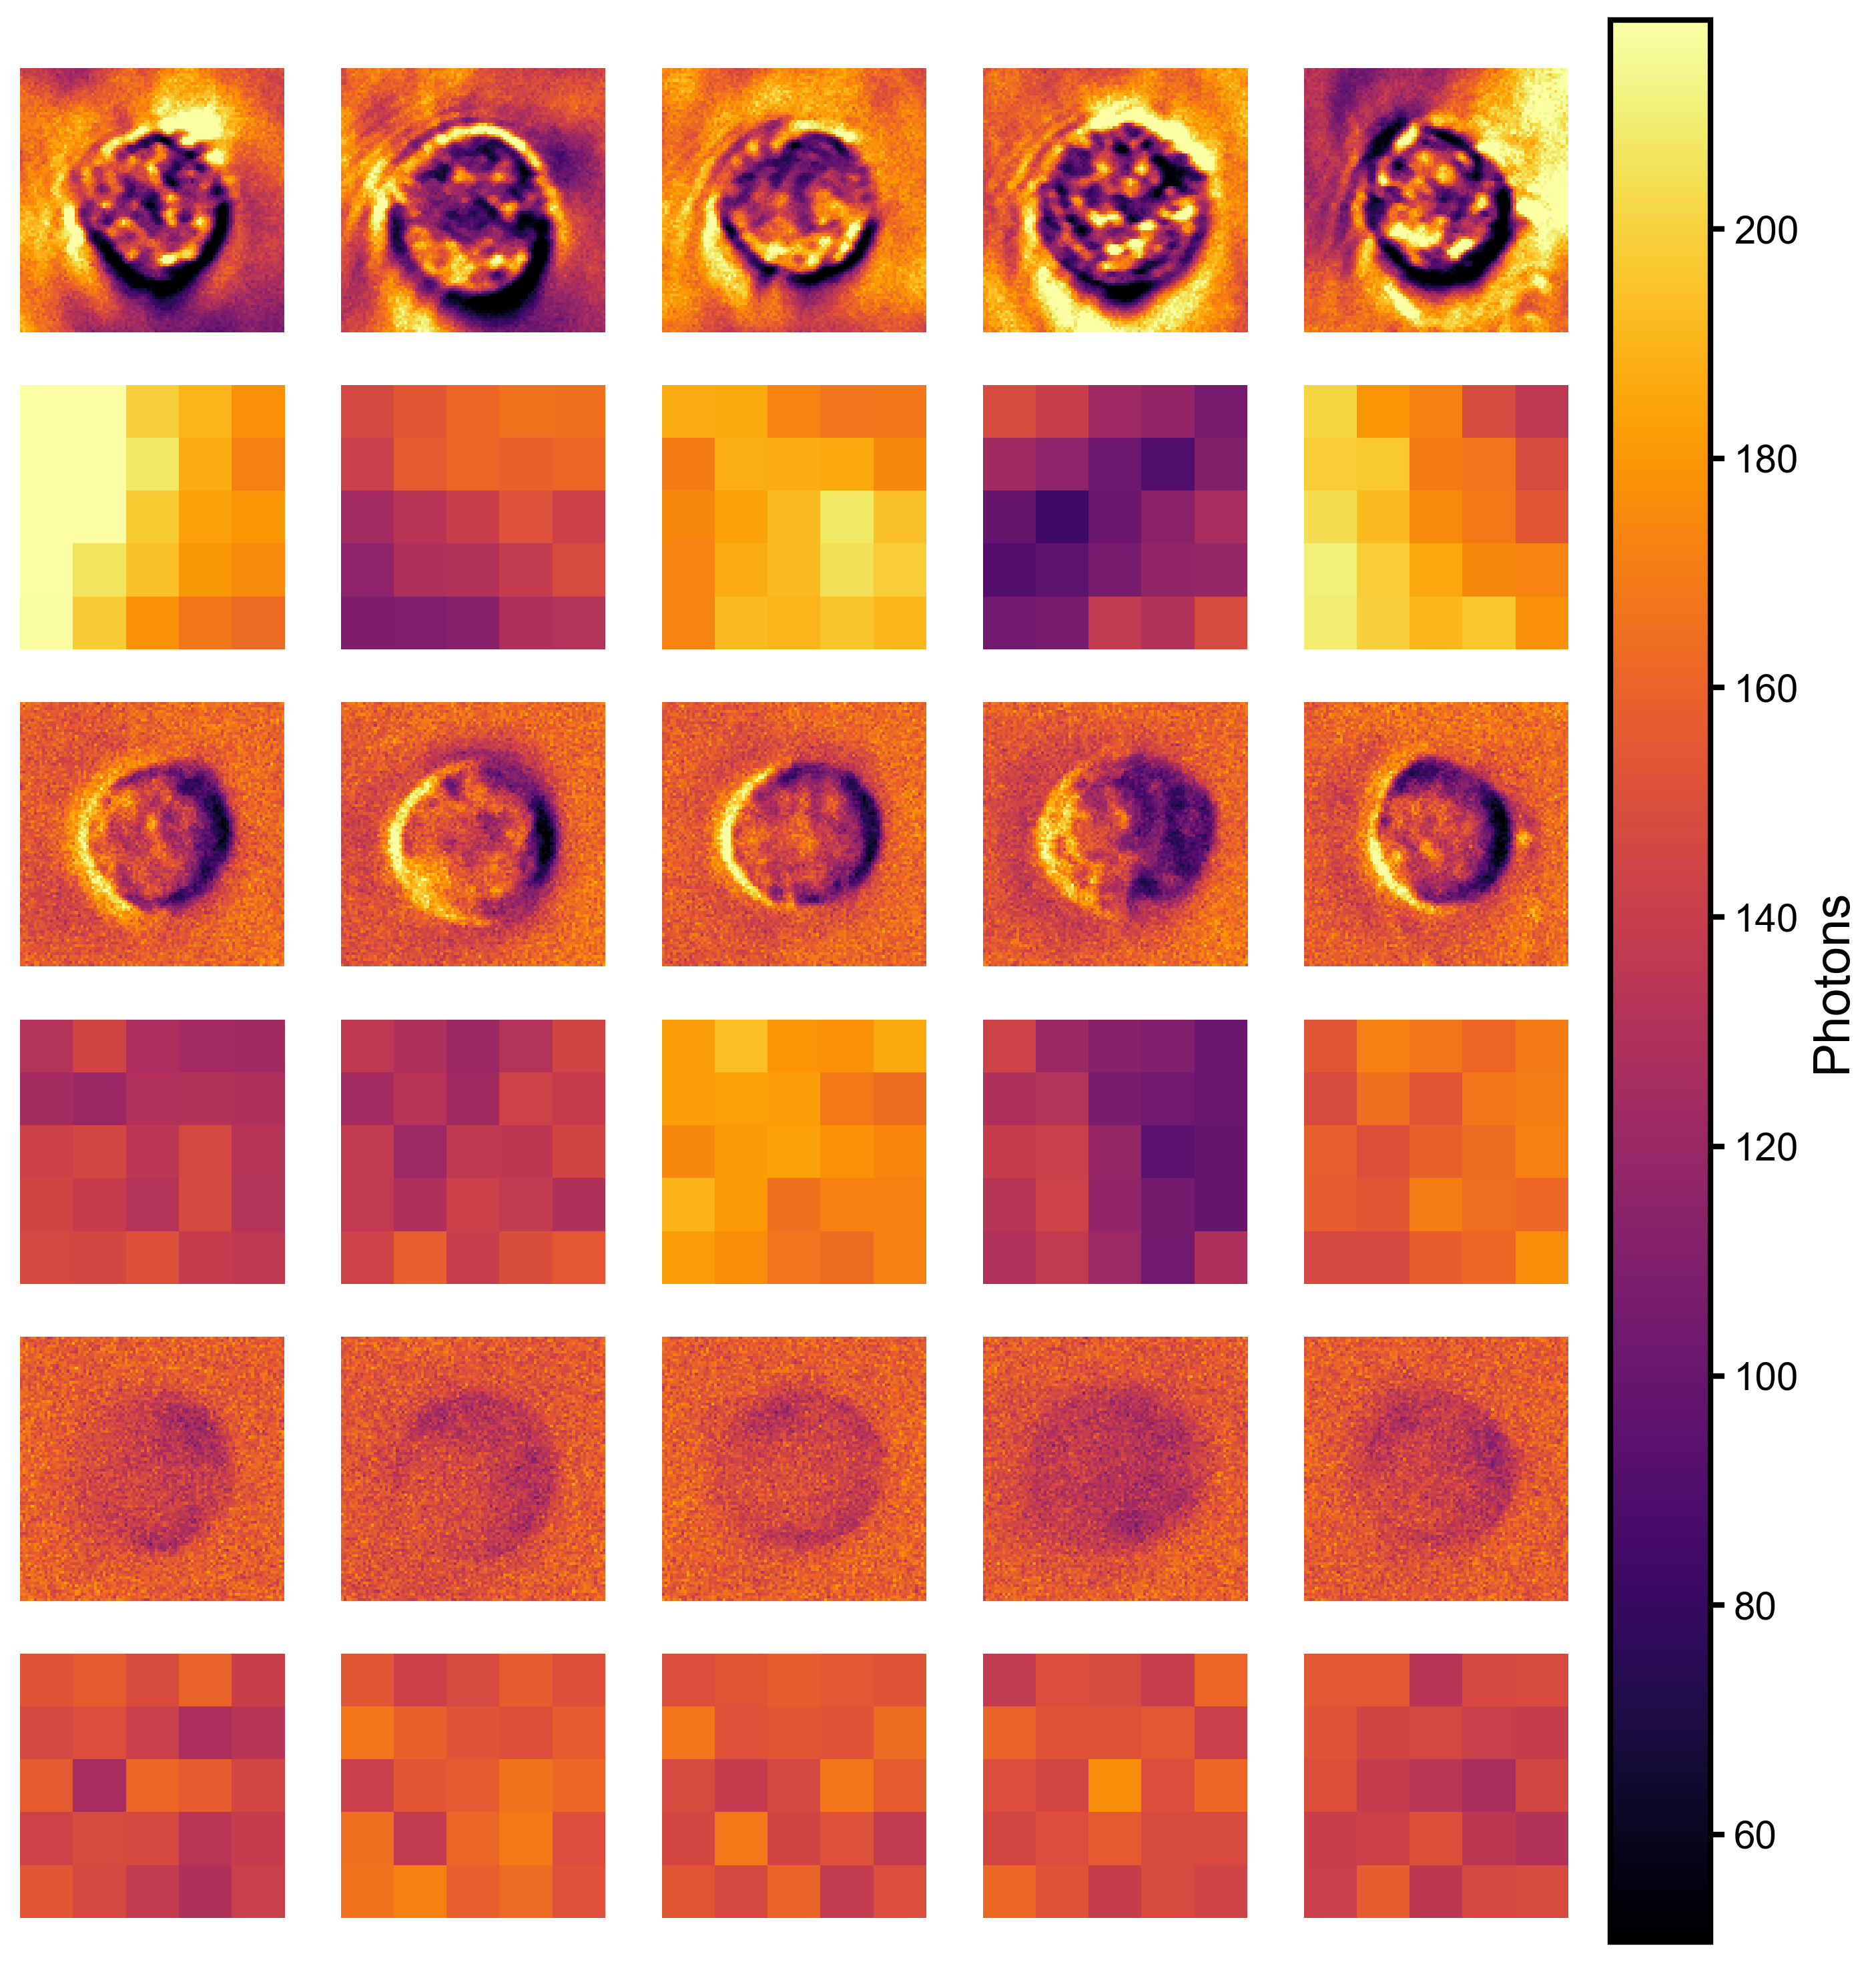

In [6]:
# TODO: put all images in same contrast
# take the min and max over all channels
# concatenate all pixels for all channels from both images and samples
# then take the min and max over all pixels
all_pix = onp.concatenate([onp.array(noisy_patches_by_channel[channel]) for channel in channels])
vmin = np.percentile(all_pix, 1)
vmax = np.percentile(all_pix, 99)

fig, image_sample_ax = plt.subplots(len(channels) * 2, num_samples, 
                                figsize=(num_samples * 2, len(channels) * 2 * 2), dpi=300)
for channel_index, channel in enumerate(channels):
    # images = patches_by_channel[channel]
    images = images_by_channel[channel][[1, 3, 19, 5, 11]]
    noisy_images = add_shot_noise_to_experimenal_data(images, photon_fraction=photons_per_pixel / np.mean(images))
    samples = image_samples[channel]
    for i in range(num_samples):
        im = image_sample_ax[channel_index * 2, i].imshow(noisy_images[i], cmap='inferno', vmin=vmin, vmax=vmax)
        image_sample_ax[channel_index * 2, i].axis('off')
        image_sample_ax[channel_index * 2 + 1, i].imshow(samples[i], cmap='inferno', vmin=vmin, vmax=vmax)
        image_sample_ax[channel_index * 2 + 1, i].axis('off')
        

    image_sample_ax[channel_index*2, 0].set_ylabel(channel + '\n(images)')
    image_sample_ax[channel_index*2 + 1, 0].set_ylabel(channel + '\n(samples)')

# show one big colorbar on the right side spanning all rows
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.1, 0.05, 0.8])
sm = cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm, cax=cbar_ax, label='Photons')

fig.savefig('/home/hpinkard_waller/figures/mutual_information/' + 'intro_images_and_samples' + '.pdf', transparent=True)

## Mutual information rate and samples vs patch size

## Dataset size vs need for regularization and variance of estiamte

## 